In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler

In [201]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [203]:
df['Sex']= df['Sex'].map({'M': 1, 'F':0})
df['ExerciseAngina']= df['ExerciseAngina'].map({'Y': 1, 'N':0})
df.drop('ChestPainType', axis=1, inplace=True)
df.drop('RestingECG', axis=1, inplace=True)
df.drop('ST_Slope', axis=1, inplace=True)

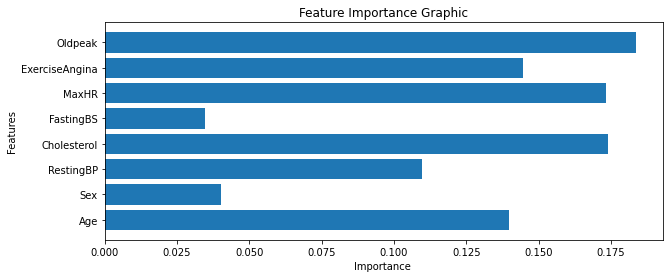

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
Y = df.HeartDisease 
X = df.iloc[:,:8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
  
best_features = SelectFromModel(model)
best_features.fit(X_train, y_train)
features = X.columns[:]
imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Feature Importance Graphic")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

In [205]:
selected_feat = ['Oldpeak','ExerciseAngina','MaxHR','Cholesterol','Age','Sex','RestingBP']

In [206]:
df['Age'] , quarantile = pd.qcut(df['Age'], 2, labels = False, retbins = True, duplicates = "drop")
df['RestingBP'] , quarantile = pd.qcut(df['RestingBP'], 2, labels = False, retbins = True, duplicates = "drop")
df['Cholesterol'] , quarantile = pd.qcut(df['Cholesterol'], 2, labels = False, retbins = True, duplicates = "drop")
df['MaxHR'] , quarantile = pd.qcut(df['MaxHR'], 2, labels = False, retbins = True, duplicates = "drop")
df['Oldpeak'] , quarantile = pd.qcut(df['Oldpeak'], 2, labels = False, retbins = True, duplicates = "drop")

In [207]:
print(quarantile)

[-2.6  0.6  6.2]


In [208]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,0,1,1,1,0,1,0,0,0
1,0,0,1,0,0,1,0,1,1
2,0,1,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,1,1
4,0,1,1,0,0,0,0,0,0


In [209]:
Y = df.HeartDisease 
X = df.iloc[:,:8]
#select= ['age','anaemia','']

In [210]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   RestingBP       918 non-null    int64
 3   Cholesterol     918 non-null    int64
 4   FastingBS       918 non-null    int64
 5   MaxHR           918 non-null    int64
 6   ExerciseAngina  918 non-null    int64
 7   Oldpeak         918 non-null    int64
dtypes: int64(8)
memory usage: 57.5 KB


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [212]:
# network parameters
batch_size = 128
hidden_units = 256
from keras.layers import Dense, Activation


In [213]:
num_labels = len(np.unique(y_train))
y_train.shape

(642,)

In [214]:
model = Sequential()
model.add(Dense(128, input_dim=8))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
from keras.utils import np_utils
# convert to one-hot vector
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [216]:
X_train.shape
#X_train = np.reshape(X_train, [-1, 12])
X_train.shape

(734, 8)

In [217]:
y_train1.shape

(734, 2)

In [218]:
model.fit(X_train, y_train1, epochs=20, batch_size=batch_size)

Epoch 1/20
6/6 [==============================] - 1s 6ms/step - loss: 0.6780 - accuracy: 0.5572
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.5777
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.6403
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.6757
Epoch 5/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.7357
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.7548
Epoch 7/20
6/6 [==============================] - 0s 5ms/step - loss: 0.5233 - accuracy: 0.7793
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 0.5030 - accuracy: 0.7807
Epoch 9/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7875
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.8011
Epoch 11/20
6/6 [======================

In [219]:
loss, acc = model.evaluate(X_test, y_test1)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

6/6 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7446

Test accuracy: 74.5%


In [220]:
X = df[selected_feat]
Y = df.HeartDisease

In [221]:
model = Sequential()
model.add(Dense(128, input_dim=len(selected_feat)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
from keras.utils import np_utils
# convert to one-hot vector
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [223]:
model.fit(X_train, y_train1, epochs=10, batch_size=batch_size)

Epoch 1/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.5559
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.6049
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7371
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7820
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7929
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.8011
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7984
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7956
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.8011
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.7956


In [224]:
loss, acc = model.evaluate(X_test, y_test1, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

2/2 [==============================] - 0s 9ms/step - loss: 0.5528 - accuracy: 0.6957

Test accuracy: 69.6%


# Using SVM

In [225]:
from sklearn.svm import SVC
kernel_lim =  {'linear', 'poly', 'rbf', 'sigmoid'}
C_lim  = {0.5,1,1.5,2,2.5,3,3.5,4,4.5,5} 
bestC = 0
bestK = 0
acc = 0
for kernel1 in kernel_lim:
  for C1 in C_lim:
    model = SVC(C=C1,kernel=kernel1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #print ('Kernel is: ' +kernel1 , 'Value of C is: ',C1, "Accuracy is: ",score*100)
    if acc < (score*100):
      bestK= kernel1
      bestC = C1
      acc = score*100
print("\n\nBest Model is with Accuracy: ", acc,"with kernel: ",bestK,"and Value of C: ",bestC)



Best Model is with Accuracy:  72.82608695652173 with kernel:  linear and Value of C:  1.5


# Naive Bayes

In [226]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("accuracy=%.2f%%" % (score * 100))

accuracy=70.11%


# Decision Trees

In [234]:
from sklearn.datasets import load_iris # Import dataset
from sklearn import tree # tree class 

Y = df.HeartDisease 
X = df.iloc[:,:8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

clf = tree.DecisionTreeClassifier(criterion = 'entropy',splitter='random',max_depth=5) # makeing a tree model (all default parameters are used) - details of parameters are given below
clf = clf.fit(X_train, y_train) 
score= clf.score(X_test,y_test)
print(f'Decision tree having entropy with random splitting has model score : {score*100}')

Decision tree having entropy with random splitting has model score : 77.53623188405797


# **Implementation of Paper**

In [ ]:
#Algorithm 3
def directKb(data):
  counts = dict()
  Kd =  dict()
  feavals = []
  for entry in data:
    features = selected_feat
    for i in range(len(features)):
      feavals.append(features[i],data.iloc[features[i]][i])
      label = data.HeartDisease[i]
      s = powerset(feavals)
      for key in s:
        if key in counts:
          counts[key]= counts[key] + [1, label]
        else:
          counts[key] = [1, label]
    
    for key in counts:
      r = counts[key][1]/counts[key][0]
       Kd[key] = r

  return Kd


In [ ]:
#Algorithm 4
def QUERYKB(query,Lk):
  for key, value in query.items(): 
    if query[key] == value:
      Lk[key][value] = Lk[key][value]+ 1
    else:
      Lk[key][value] = 0
  
  return Lk


In [ ]:
#Algorithm 5
def QUERYRELEVANT(Q,KD):
  relevantKB = dict()
  for key,val in Q.items():
      feavals.append(key,val)
  s = powerset(feavals,Kb)
  for key in s:
    for clause in key:
      relevantKB.append(clause)
  return relevantKB

In [ ]:
#Algorithm 6
def COMPUTEEXPLANATION(Q,LK, k):
  if QUERYKB(Q,LK) > O.5:
    return max ( QUERYKB(Q,LK) )
  else:
    return min(QUERYKB(Q,LK) )